In [3]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn

### Убийства с применением огнестрельного оружия в США.

Этот набор данных включает в себя информацию об убийствах с применением огнестрельного оружия в США за 2012-2014 года.

### Загружаем данные

Данные включают данные о возрасте, поле, расе, образовании, намерениях, времени (месяц и год) и месте смерти жертвы, а также о том, находилась ли полиция на месте преступления.
Необходимо определить какое умысел был у жертвы.

In [4]:
url="https://raw.githubusercontent.com/vdmkrnnk/machine-learning/master/guns.csv"
data = pd.read_csv(url)

Посмотрим на размер таблицы

In [5]:
data.shape

(100798, 11)

Выведем первые 5 строк таблицы

In [6]:
data.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


Выведем последние 5 строк таблицы

In [7]:
data.tail()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
100793,100794,2014,12,Homicide,0,M,36.0,Black,100,Home,2.0
100794,100795,2014,12,Homicide,0,M,19.0,Black,100,Street,2.0
100795,100796,2014,12,Homicide,0,M,20.0,Black,100,Street,2.0
100796,100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,1.0
100797,100798,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,2.0


Выведем имена признаков(столбцов)

In [8]:
data.columns

Index(['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')

Каждый признак имеет своё имя:

Unnamed: 0 - ID 
year - Год, в котором произошел смертельный исход.
month - Месяц, в котором произошел смертельный исход.
intent - Умысел исполнителя преступления. Это может быть самоубийство, случайное убийство, непреднамеренное убийство или неопределенное убийство.
police - Был ли причастен к стрельбе полицейский. Либо 0 (ложь), либо 1 (правда).
sex - Пол жертвы. Либо M(мужской), либо F(женский).
age - Возраст жертвы.
race - Раса жертвы. Либо выходец из Азии / Тихого океана(Either Asian/Pacific Islander), коренной американец / коренной житель Аляски(Native American/Native Alaskan), черный(Black), латиноамериканец(Hispanic) или белый(White).
hispanic - Код, указывающий на испаноязычное происхождение жертвы.
place - Где произошла стрельба.
education - Образовательный статус жертвы. Может быть одним из следующих: 
    1: Меньше средней школы 
    2: Окончил среднюю школу или ее эквивалент 
    3: Учится в колледже 
    4: По крайней мере, окончил колледж 
    5: Неизвестно
    
Признаки intent, sex, race, place - категориальные

Признаки Unnamed: 0, year, month, police, age, hispanic, education - числовые

Переименуем первый столбец для удобства

In [9]:
ndata = pd.DataFrame(data)
ndata.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
ndata.columns

Index(['ID', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')

In [10]:
ndata.dtypes

ID             int64
year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
hispanic       int64
place         object
education    float64
dtype: object

Все категориальные признаки, имеющие тип 'Object' переведём в специальный тип, предназначенный для хранения категориальных значений

In [11]:
for item in ['intent','sex', 'race', 'place']:
  ndata[item] = ndata[item].astype('category');

In [12]:
ndata.dtypes

ID              int64
year            int64
month           int64
intent       category
police          int64
sex          category
age           float64
race         category
hispanic        int64
place        category
education     float64
dtype: object

### Боремся с выбросами
Если взять статистику, то код указывающий на испаноязычное происхождение жертвы более 100 присутствует только у латиноамериканского этноса. Построим диаграмму расссеивания для признаков hispanic и race.

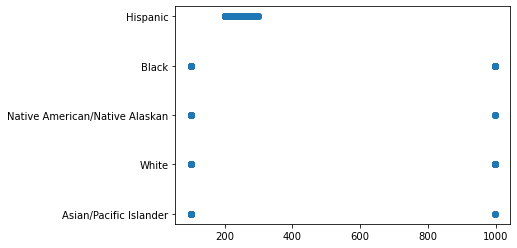

In [13]:
plt.scatter(x='hispanic', y='race', data=ndata)
pass

Из диаграммы видно, что у рас, не относящимся к латиноамериканцам, присутствует код, указывающий на их испаноязычное происхождение и равный около 1000. Такие данные можно считать нереальными, т.к. код у нелатиноамериканцев равен 100, а у латиноамериканцев он варьируется от 200 до 300, где если значение ближе к 200, то один из родителей латиноамериканец, иначе оба родителя латиноамериканцы. Эти данные мы будем считать за выбросы.


Для обнаружения выбросов найдём квантили для признака hispanic

In [14]:
ndata['hispanic'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    100.0
0.010    100.0
0.050    100.0
0.100    100.0
0.500    100.0
0.900    100.0
0.950    210.0
0.990    281.0
0.995    282.0
Name: hispanic, dtype: float64

Удалим все строки таблицы, в которых hispanic выходят за пределы квантили $0.995$

In [15]:
rows_to_drop = ndata[
    (data['hispanic'] > data['hispanic'].quantile(0.995))].index
ndata = ndata.drop(rows_to_drop)
ndata.shape

(100475, 11)

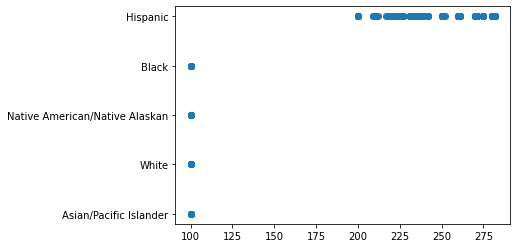

In [16]:
plt.scatter(x='hispanic', y='race', data=ndata)
pass

In [17]:
rows_to_drop

Int64Index([     9,    116,   1611,   1701,   1871,   2020,   2059,   2202,
              2381,   4066,
            ...
             98810,  98883,  98887,  98912,  99403,  99621, 100613, 100650,
            100663, 100682],
           dtype='int64', length=323)

### Заполнение пропущенных значений

In [18]:
ndata.isna().sum()

ID              0
year            0
month           0
intent          1
police          0
sex             0
age             7
race            0
hispanic        0
place        1380
education      53
dtype: int64

In [19]:
ndata.fillna(ndata.median(axis = 0), axis=0 , inplace=True)

In [20]:
ndata['intent'].fillna(ndata['intent'].mode().iloc[0], inplace=True)

In [21]:
ndata['place'].fillna(ndata['place'].mode().iloc[0], inplace=True)

In [22]:
ndata.isna().sum()

ID           0
year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64

In [23]:
ndata.shape

(100475, 11)

### Визуализация и описательная статистика

In [26]:
ndata.describe()

,ID,year,month,police,age,hispanic,education
count,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000
mean,50393.671242,2013.000259,6.567116,0.013914,43.849744,111.436736,2.291684
std,29097.271812,0.816212,3.405564,0.117134,19.497636,37.309099,0.984405
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,25185.500000,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,50392.000000,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,75595.500000,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,282.000000,5.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [28]:
ndata.describe(include=['category'])

,intent,sex,race,place
count,100475,100475,100475,100475
unique,4,2,5,10
top,Suicide,M,White,Home
freq,62975,86068,66009,61696


Какие возроста связаны с тем или иным умыслом

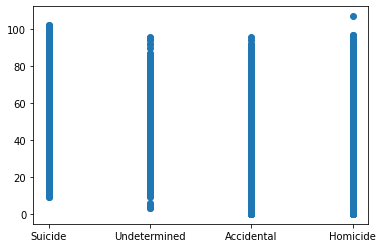

In [37]:
plt.scatter(ndata['intent'], ndata['age'])
pass

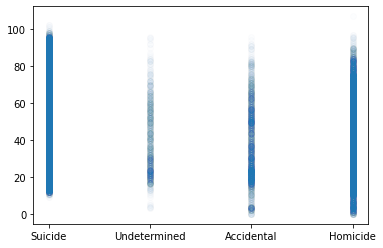

In [38]:
plt.scatter(ndata['intent'], ndata['age'], alpha=0.01)
pass

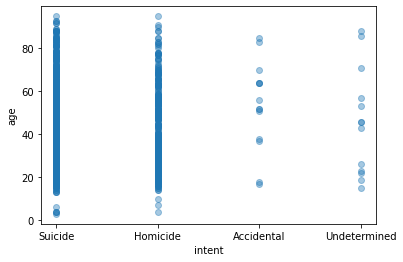

In [44]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(ndata.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['intent'], ndata.iloc[random_subset]['age'], alpha=0.4)
plt.xlabel('intent')
plt.ylabel('age')
pass

Какое образование имели жертвы в том или ином возрасте

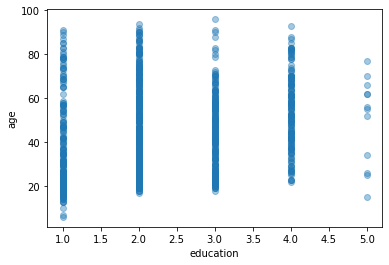

In [46]:
plt.scatter(data.iloc[random_subset]['education'], data.iloc[random_subset]['age'], alpha = .4)
plt.xlabel('education')
plt.ylabel('age')
pass

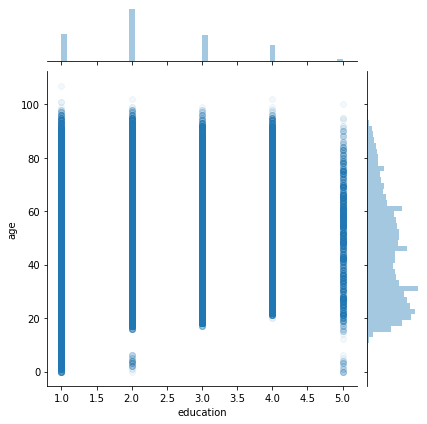

In [57]:
sns.jointplot(x='education', y='age', alpha=.05, data=ndata)
pass

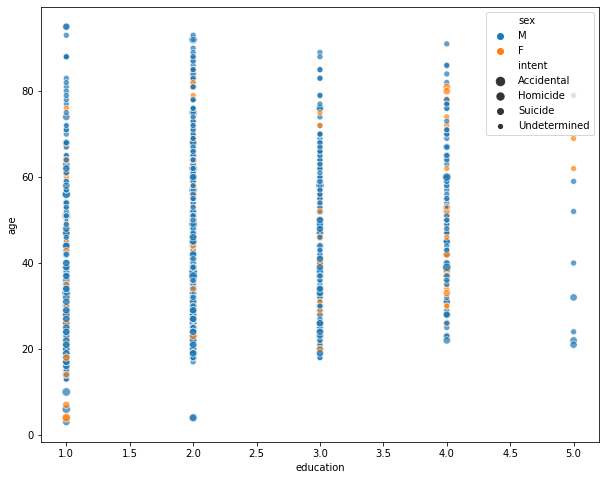

In [60]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='education', y='age', size='intent', hue='sex', data=ndata.iloc[random_subset], alpha=0.7)
pass

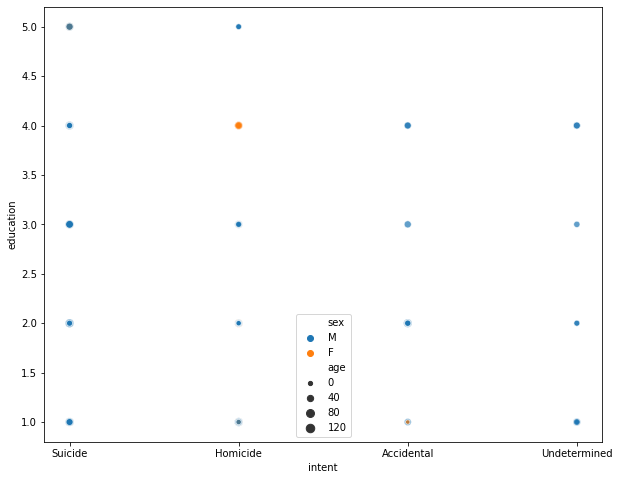

In [61]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='intent', y='education', size='age', hue='sex', data=ndata.iloc[random_subset], alpha=0.7)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных

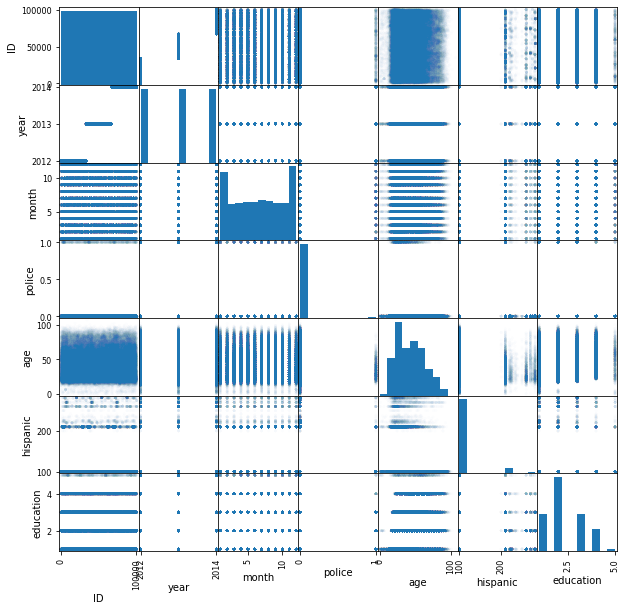

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(ndata, alpha = .01, figsize = (10, 10))
pass

Ящик с усами

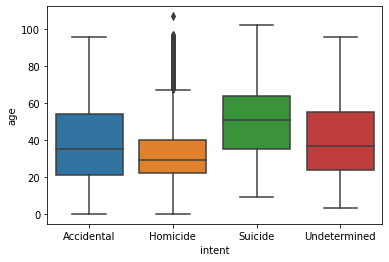

In [81]:
sns.boxplot(x="intent", y="age", data=ndata)
pass

Скрипичные графики

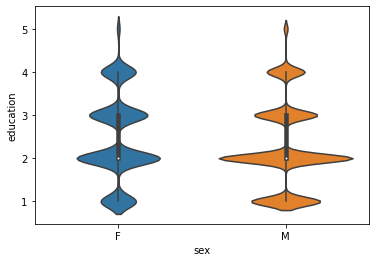

In [78]:
sns.violinplot(x="sex", y="education", data=ndata)
pass

Корреляционная матрица

In [69]:
corr_mat = ndata.corr()
corr_mat

,ID,year,month,police,age,hispanic,education
ID,1.000000,0.942844,0.018030,-0.004487,0.015472,-0.020954,0.009567
year,0.942844,1.000000,0.006392,-0.000662,0.016484,-0.001301,0.009940
month,0.018030,0.006392,1.000000,-0.002366,-0.008857,0.008078,-0.001551
police,-0.004487,-0.000662,-0.002366,1.000000,-0.047575,0.044662,-0.028033
age,0.015472,0.016484,-0.008857,-0.047575,1.000000,-0.160344,0.236073
hispanic,-0.020954,-0.001301,0.008078,0.044662,-0.160344,1.000000,-0.126289
education,0.009567,0.009940,-0.001551,-0.028033,0.236073,-0.126289,1.000000


In [70]:
corr_mat > 0.5

,ID,year,month,police,age,hispanic,education
ID,True,True,False,False,False,False,False
year,True,True,False,False,False,False,False
month,False,False,True,False,False,False,False
police,False,False,False,True,False,False,False
age,False,False,False,False,True,False,False
hispanic,False,False,False,False,False,True,False
education,False,False,False,False,False,False,True


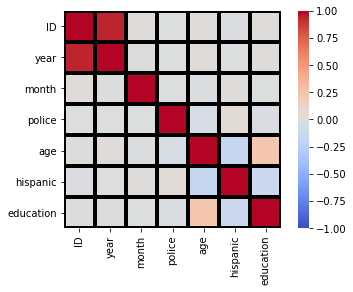

In [71]:
sns.heatmap(corr_mat,  vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='coolwarm')
pass

Видна слабая корреляция между возрастом и типом образования.

Диаграмма количества инцидентов по умыслу

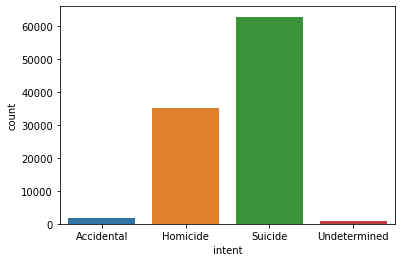

In [80]:
sns.countplot(x='intent', data=ndata)
pass

### Векторизация

In [82]:
categorical_columns = [c for c in ndata.columns if ndata[c].dtype.name == 'category']
numerical_columns   = [c for c in ndata.columns if ndata[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['intent', 'sex', 'race', 'place']
numerical_columns= ['ID', 'year', 'month', 'police', 'age', 'hispanic', 'education']


Не будем бинаризировать целевой признак intent

In [83]:
categorical_columns_exept_intent= ['sex', 'race', 'place']

In [84]:
ndata_describe = ndata.describe(include=['category'])
binary_columns    = [c for c in categorical_columns_exept_intent if ndata_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns_exept_intent if ndata_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['sex']
nonbinary_columns= ['race', 'place']


Бинарный признак sex заменим на числовой

In [85]:
ndata['sex'] = pd.factorize(ndata['sex'])[0]

Применим метод бинаризации (one-hot encoding)

In [86]:
ndata_categorical = pd.get_dummies(ndata[nonbinary_columns])
print(ndata_categorical.columns)

Index(['race_Asian/Pacific Islander', 'race_Black', 'race_Hispanic',
       'race_Native American/Native Alaskan', 'race_White', 'place_Farm',
       'place_Home', 'place_Industrial/construction', 'place_Other specified',
       'place_Other unspecified', 'place_Residential institution',
       'place_School/instiution', 'place_Sports', 'place_Street',
       'place_Trade/service area'],
      dtype='object')


### Нормализация

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [88]:
numerical_columns= ['ID', 'year', 'month', 'police', 'age', 'hispanic', 'education']

In [89]:
ndata_numerical = ndata[numerical_columns]
ndata_numerical.describe()

,ID,year,month,police,age,hispanic,education
count,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000
mean,50393.671242,2013.000259,6.567116,0.013914,43.849744,111.436736,2.291684
std,29097.271812,0.816212,3.405564,0.117134,19.497636,37.309099,0.984405
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,25185.500000,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,50392.000000,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,75595.500000,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,282.000000,5.000000


In [90]:
ndata_numerical = (ndata_numerical - ndata_numerical.mean(axis = 0))/ndata_numerical.std(axis = 0)

In [91]:
ndata_numerical.describe()

,ID,year,month,police,age,hispanic,education
count,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05
mean,2.232269e-16,-1.100216e-12,-2.657032e-15,3.787278e-15,3.035586e-16,2.579487e-14,1.493970e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731869e+00,-1.225489e+00,-1.634712e+00,-1.187859e-01,-2.248977e+00,-3.065401e-01,-1.312148e+00
25%,-8.663414e-01,-1.225489e+00,-7.538006e-01,-1.187859e-01,-8.641942e-01,-3.065401e-01,-2.963055e-01
50%,-5.743637e-05,-3.170387e-04,1.271107e-01,-1.187859e-01,-9.487015e-02,-3.065401e-01,-2.963055e-01
75%,8.661234e-01,1.224855e+00,7.143849e-01,-1.187859e-01,7.257421e-01,-3.065401e-01,7.195369e-01
max,1.732270e+00,1.224855e+00,1.595296e+00,8.418422e+00,3.238867e+00,4.571626e+00,2.751221e+00


### Соединяем всё в одну таблицу

In [93]:
ndata = pd.concat((ndata['intent'], ndata_numerical, ndata_categorical), axis = 1)
print(ndata.shape)

(100475, 23)


In [94]:
ndata.describe()

,ID,year,month,police,age,hispanic,education,race_Asian/Pacific Islander,race_Black,race_Hispanic,...,place_Farm,place_Home,place_Industrial/construction,place_Other specified,place_Other unspecified,place_Residential institution,place_School/instiution,place_Sports,place_Street,place_Trade/service area
count,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,1.004750e+05,100475.000000,100475.000000,100475.000000,...,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000,100475.000000
mean,2.232269e-16,-1.100216e-12,-2.657032e-15,3.787278e-15,3.035586e-16,2.579487e-14,1.493970e-15,0.013167,0.231122,0.089654,...,0.004678,0.614043,0.002438,0.136273,0.087922,0.002020,0.006668,0.001274,0.110555,0.034128
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.113992,0.421552,0.285687,...,0.068234,0.486823,0.049320,0.343080,0.283183,0.044904,0.081387,0.035670,0.313582,0.181559
min,-1.731869e+00,-1.225489e+00,-1.634712e+00,-1.187859e-01,-2.248977e+00,-3.065401e-01,-1.312148e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.663414e-01,-1.225489e+00,-7.538006e-01,-1.187859e-01,-8.641942e-01,-3.065401e-01,-2.963055e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.743637e-05,-3.170387e-04,1.271107e-01,-1.187859e-01,-9.487015e-02,-3.065401e-01,-2.963055e-01,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.661234e-01,1.224855e+00,7.143849e-01,-1.187859e-01,7.257421e-01,-3.065401e-01,7.195369e-01,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.732270e+00,1.224855e+00,1.595296e+00,8.418422e+00,3.238867e+00,4.571626e+00,2.751221e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### X и Y Отброр признаков

In [95]:
X = ndata.drop('intent', axis = 1) 
y = ndata['intent']

In [96]:
print(X.shape)
print(y.shape)

(100475, 22)
(100475,)


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

70332 30143


### KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [99]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [100]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.15826366376613774 0.1750986962147099


In [101]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[    5   154   330     0]
 [    6  7792  2810     0]
 [    0  1746 17068     0]
 [    0    62   170     0]]


Найдём оптимальное значение соседей

In [102]:
from sklearn.model_selection import GridSearchCV
nnb = [1,10,20,30,40,50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.16771891526768423 30


Оптимальное значение соседей = 30

Ошибки на обучающей и тестовой выборках:

In [103]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16429221407040892 0.17058686925654382


### Практическая работа №2

### LDA

In [104]:
intents=['Accidental', 'Homicide', 'Suicide', 'Undetermined']

In [105]:
colors=['green','red','blue','yellow','cyan','black']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

70332 30143


In [107]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = lda_model.predict(X_train)
y_test_pred  = lda_model.predict(X_test)
print (np.mean(y_train_pred != y_train))
print (np.mean(y_test_pred  != y_test))

0.17101746004663596
0.1737385130876157


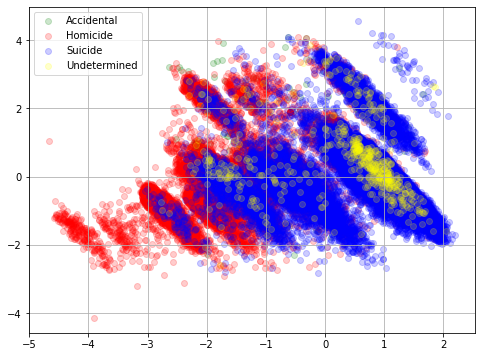

In [108]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
plt.figure(figsize = (8, 6))
for i in range(len(intents)):
    plt.scatter(X_lda[y_train == intents[i], 0], X_lda[y_train == intents[i], 1], 
                color = colors[i], label = intents[i], alpha = 0.2)
plt.legend()
plt.grid()
pass

### PCA

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[ 2.06413134, -0.89279086],
       [ 2.13382173, -0.06795616],
       [ 1.98857351, -1.82194548],
       ...,
       [-2.01362307,  1.26388237],
       [-1.8142673 ,  3.92815241],
       [-2.06373658,  0.49012931]])

In [111]:
pca_X = pd.DataFrame(data=principal_components,
                     columns = ['principal_component_1', 'principal_component_2'])
pca_X.head()

,principal_component_1,principal_component_2
0,2.064131,-0.892791
1,2.133822,-0.067956
2,1.988574,-1.821945
3,1.958174,-2.044879
4,2.134238,0.106449


In [113]:
final_data = pd.concat([pca_X, y], axis=1)
final_data.head()

,principal_component_1,principal_component_2,intent
0,2.064131,-0.892791,Suicide
1,2.133822,-0.067956,Suicide
2,1.988574,-1.821945,Suicide
3,1.958174,-2.044879,Suicide
4,2.134238,0.106449,Suicide


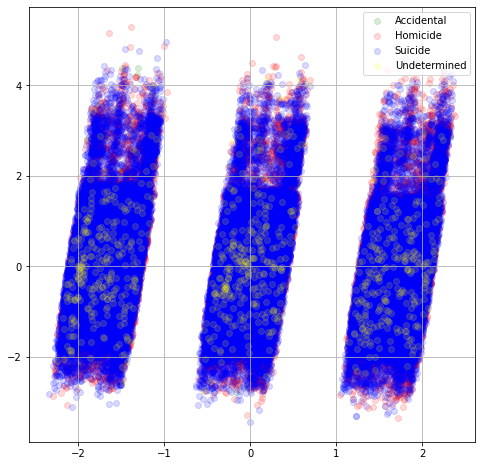

In [114]:
plt.figure(figsize = (8, 8))
for item in range(len(intents)):
  plt.scatter(final_data[final_data['intent'] == intents[item]]['principal_component_1'],
            final_data[final_data['intent'] ==  intents[item]]['principal_component_2'],
            alpha = 0.15,
            label =  intents[item],
            color = colors[item])
plt.legend()
plt.grid()
pass

In [115]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

70332 30143


Возьмем вычисленное ранее best_n_neighbors и применим kNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.22971051583916283 0.244866138075175


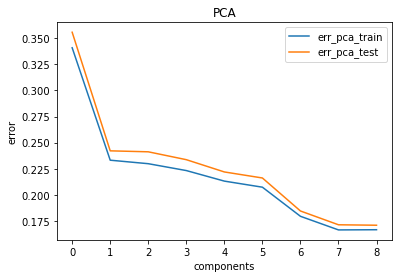

In [117]:
comp = range(1, 10, 1)
err_pca_train = []
err_pca_test = []
for n in comp:
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 50).fit(X_train, y_train)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    
    err_pca_train.append(err_train)
    err_pca_test.append(err_test)
plt.plot(err_pca_train, label='err_pca_train')
plt.plot(err_pca_test, label='err_pca_test')
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [118]:
print(err_pca_test.index(min(err_pca_test)), min(err_pca_test))

8 0.17095179643698372


Наибольшая точность для best_n_neighbors = 30 достигается при 8 главных компонентах. Ошибка на тестовых данных возросла на 0.000365, чем при использовании метода kNN на исходных данных.

При использовании LDA ошибка на тестовой выборке ухудшилась на 0.003. PCA показал себя не на много, но лучше.